<a href="https://colab.research.google.com/github/TheJacksonLab/CDS_Projects_2023/blob/main/Keras_ConvNet_Example_MolImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The way keras.utils.image_dataset_from_directory works means you have to do
#some sketchy things to get this to run correctly, like deleting .config/.
#Execute the following three commands below to clear out the directory so that
#this can run as we would like.
!rm -r .config/
!rm -r class_*/
!rm -r sample_data/
!tar -xzvf image_ringcounter_counter.tar.gz

Streaming output truncated to the last 5000 lines.
class_1/image_A-3700.jpg
class_1/image_B-3974.jpg
class_1/image_C-1756.jpg
class_1/image_A-3847.jpg
class_1/image_B-1756.jpg
class_1/image_A-575.jpg
class_1/image_B-2539.jpg
class_1/image_B-1030.jpg
class_1/image_B-1018.jpg
class_1/image_B-2263.jpg
class_1/image_B-4174.jpg
class_1/image_B-2505.jpg
class_1/image_A-4899.jpg
class_1/image_A-3884.jpg
class_1/image_F-1204.jpg
class_1/image_I-6.jpg
class_1/image_C-1781.jpg
class_1/image_A-6042.jpg
class_1/image_A-1705.jpg
class_1/image_C-128.jpg
class_1/image_A-29.jpg
class_1/image_B-2049.jpg
class_1/image_B-3431.jpg
class_1/image_A-4480.jpg
class_1/image_B-2075.jpg
class_1/image_B-2713.jpg
class_1/image_B-2707.jpg
class_1/image_B-850.jpg
class_1/image_B-3419.jpg
class_1/image_F-521.jpg
class_1/image_A-4325.jpg
class_1/image_B-2934.jpg
class_1/image_B-2920.jpg
class_1/image_B-1597.jpg
class_1/image_F-535.jpg
class_1/image_B-2908.jpg
class_1/image_A-950.jpg
class_1/image_F-509.jpg
class_1/ima

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt

Found 8574 files belonging to 5 classes.
Using 7717 files for training.
Using 857 files for validation.
['class_0', 'class_1', 'class_2', 'class_3', 'class_4']


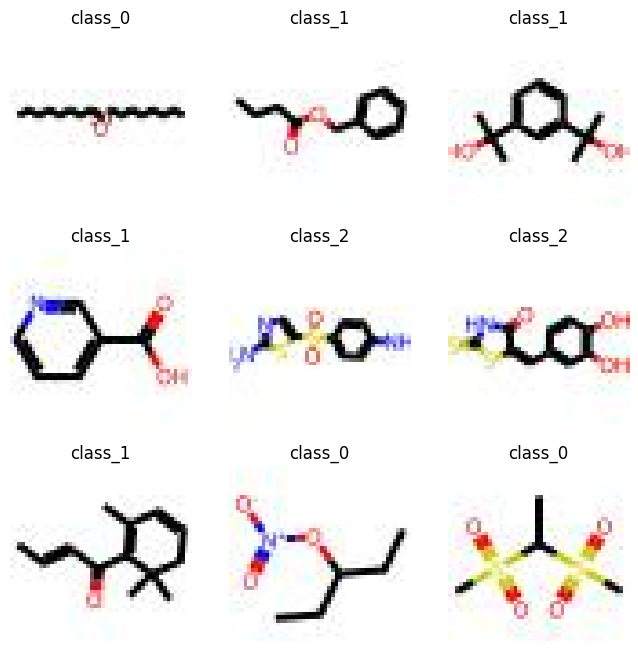

In [ ]:
image_size_ = (50,50)
batch_size_ = 32
input_shape = image_size_
num_classes = 5
train_ds,val_ds = tf.keras.utils.image_dataset_from_directory(
    './',
    validation_split=0.1,
    subset='both',
    seed=123,
    image_size=image_size_,
    batch_size=batch_size_,
    color_mode='rgb')

class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(8, 8))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 50, 50, 3)
(32,)


In [ ]:
num_classes = len(class_names)
model = keras.Sequential(
  [
    layers.Rescaling(1./255, input_shape=(50, 50, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same',activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), padding='same',activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), padding='same',activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        3

In [ ]:
# define the checkpoint
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 30
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks_list
)

Epoch 1/30
241/242 [============================>.] - ETA: 0s - loss: 0.2294 - accuracy: 0.9123
Epoch 1: val_loss improved from inf to 0.34377, saving model to weights-improvement-01-0.2296.hdf5
242/242 [==============================] - 28s 116ms/step - loss: 0.2296 - accuracy: 0.9121 - val_loss: 0.3438 - val_accuracy: 0.8763
Epoch 2/30
241/242 [============================>.] - ETA: 0s - loss: 0.2224 - accuracy: 0.9156
Epoch 2: val_loss improved from 0.34377 to 0.33528, saving model to weights-improvement-02-0.2224.hdf5
242/242 [==============================] - 29s 118ms/step - loss: 0.2224 - accuracy: 0.9155 - val_loss: 0.3353 - val_accuracy: 0.8763
Epoch 3/30
241/242 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9196
Epoch 3: val_loss did not improve from 0.33528
242/242 [==============================] - 28s 116ms/step - loss: 0.2131 - accuracy: 0.9197 - val_loss: 0.3501 - val_accuracy: 0.8763
Epoch 4/30
241/242 [============================>.] - ETA: 0s

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

NameError: ignored